X train shape: (426, 2)
logreg score: 0.95
Confusion matrix:
[[48  5]
 [ 2 88]]
(tn, fp, fn, tp): 48, 5, 2, 88
f1 score: 0.96
             precision    recall  f1-score   support

          0       0.96      0.91      0.93        53
          1       0.95      0.98      0.96        90

avg / total       0.95      0.95      0.95       143



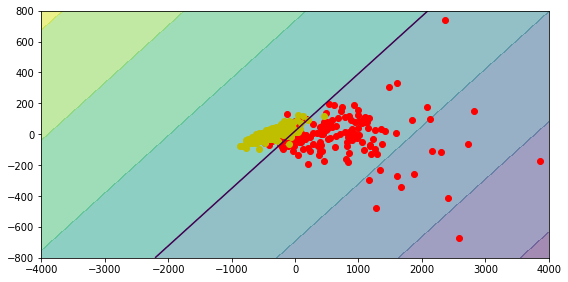

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
# pca = PCA(n_components=2)
# pca.fit(data.data)
# data_pca = pca.transform(data.data)

X_train, X_test, y_train, y_test = train_test_split(data_pca, data.target, random_state=0)
print("X train shape: {}".format(X_train.shape))

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))
confusion = confusion_matrix(y_test, pred_logreg)
(tn, fp, fn, tp) = confusion.ravel()
print("Confusion matrix:\n{}".format(confusion))
print("(tn, fp, fn, tp): {}, {}, {}, {}".format(tn, fp, fn, tp))
print("f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))
print(classification_report(y_test, pred_logreg))

plt.figure(figsize=(20, 10))
xx = np.linspace(-4000, 4000, 1000)
yy = np.linspace(-800, 800, 1000).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.decision_function(Xfull)
Z = Z.reshape(xx.shape)

probas = logreg.predict_proba(Xfull)
probas = probas[:, 1]
probas = probas.reshape(xx.shape)
plt.subplot(223)
plt.contour(xx, yy, probas, levels=[.5])
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train[:, 0][y_train == 0], 
            X_train[:, 1][y_train == 0], c='r')
plt.scatter(X_train[:, 0][y_train == 1], 
            X_train[:, 1][y_train == 1], c='y')



Text(0,0.5,'Recall')

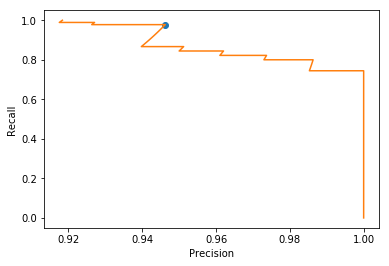

In [16]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, logreg.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o')
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

Explicit accuracy scoring: [0.91578947 0.96842105 0.91005291]
AUC scoring: [0.98709906 0.99597586 0.98055222]


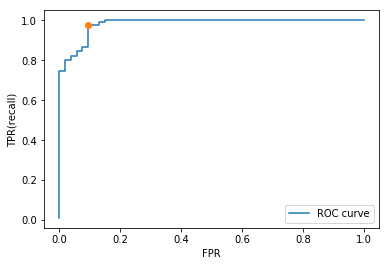

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o')
plt.legend(loc=4)

explicit_accuracy = cross_val_score(logreg, data.data, 
                                    data.target, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

roc_auc = cross_val_score(logreg, data.data,
                         data.target, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))